Cargar la base de datos:

In [ ]:
# importar todas las funciones de pylab
from pylab import *
# importar el módulo pyplot
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving datos4.json to datos4 (1).json


# 1.Creación del modelo básico con un atributo.
En este apartado se va a crear un modelo utilizando LinearRegressor de la biblioteca Scikit-learn para predecir la estancia en la que estamos utilizando solamente el RSSI de la red WiFi del punto de acceso WiFi con conexión a Internet de la vivienda. La API de LinearRegressor se encarga de realizar un ajuste del modelo y presenta métodos para realizar el entrenamiento, la evaluación e inferencia del modelo.

La creación del modelo requiere conocer la variable etiqueta (u objetivo) que se desea predecir, en este caso, será la variable *Distancia* y la variable atributo que consiste en una o varias variables de entrada para el modelo de regresión lineal, en este caso, será la variable *RSSI_x*. **El entrenamiento y evaluación del modelos se realiza con diferente conjunto de datos**.

1.- Instalar el paquete scikit-learn para construir el modelo y separar las etiquetas (AY) de los atributos (AX). En nuestro caso, en la tabla AY se guardarán los datos de la `Estancia`, mientras que en AX se guardarán los valores de `RSSI_AP`:

In [ ]:
from sklearn import linear_model
import random
from scipy.special import expit
import pandas as pd


aX = []
aY = []
aX_Baliza0 = []
aY_Baliza0 = []
aX_Baliza1 = []
aY_Baliza1 = []
aX_Baliza2 = []
aY_Baliza2 = []
aX_Baliza3 = []
aY_Baliza3 = []

df = pd.read_json ('datos4.json', lines=True)
print(df)
for _, fila in df.iterrows():
    fila = dict(fila)   

    n_baliza = fila['N-baliza']
    x = fila['coord-x']
    y = fila['coord-y']
    # print(fila)
    for i, baliza in enumerate(fila['balizas']):
        # print(baliza)
        x2 = baliza['pos-x']
        y2 = baliza['pos-y']      
        #distancia = int(20*math.sqrt((x2-x)**2+(y2-y)**2))
        distancia = int(20*math.sqrt((x2-x)**2+(y2-y)**2))
        # print("distancia: ", distancia)
        aX.append(baliza['señal'])
        aY.append(distancia)
        if x2==0 and y2 ==0:
              aX_Baliza0.append(baliza['señal'])
              aY_Baliza0.append(distancia)
        if x2==14 and y2==0:
              aX_Baliza1.append(baliza['señal'])
              aY_Baliza1.append(distancia)
        if x2==14 and y2==14:
              aX_Baliza2.append(baliza['señal'])
              aY_Baliza2.append(distancia)
        if x2==0 and y2==14:
              aX_Baliza3.append(baliza['señal'])
              aY_Baliza3.append(distancia)


     coord-x  ...                                            balizas
0          0  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
1          0  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
2          0  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
3          0  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
4          0  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
..       ...  ...                                                ...
220       14  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
221       14  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
222       14  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
223       14  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...
224       14  ...  [{'id-baliza': '1', 'pos-x': 0, 'pos-y': 0, 's...

[225 rows x 4 columns]


Mostrar una gráfica con los 900 datos.

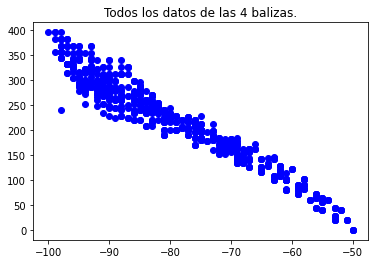

In [ ]:

plt.scatter(aX,aY, label='datos',color='blue')
plt.title('Todos los datos de las 4 balizas.');

Mostrar una gráfica con los datos de la baliza 0 (superior izquierda, es decir, 
coordenadas 0,0)

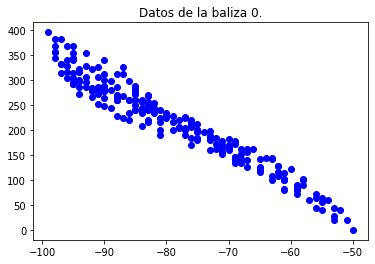

In [ ]:
plt.scatter(aX_Baliza0,aY_Baliza0, label='datos',color='blue')
plt.title('Datos de la baliza 0.');


Mostrar una gráfica con los datos de la baliza 1 (superior derecha, es decir, 
coordenadas 14,0))

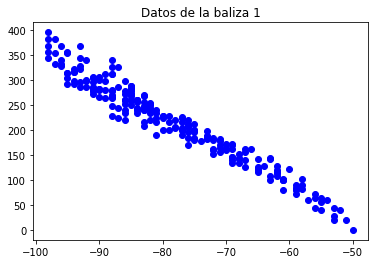

In [ ]:
plt.scatter(aX_Baliza1,aY_Baliza1, label='datos',color='blue')
plt.title('Datos de la baliza 1');


Mostrar una gráfica con los datos de la baliza 2 (inferior derecha, es decir, 
coordenadas 14,14))

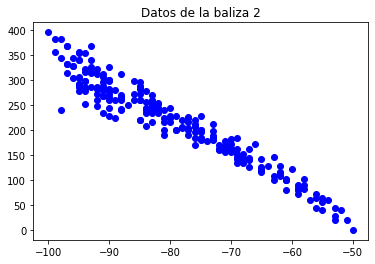

In [ ]:
plt.scatter(aX_Baliza2,aY_Baliza2, label='datos',color='blue')
plt.title('Datos de la baliza 2');


Mostrar una gráfica con los datos de la baliza 3 (inferior izquierda, es decir, 
coordenadas 0,14))

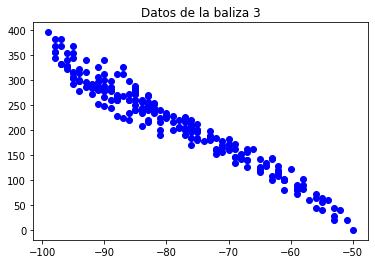

In [ ]:
plt.scatter(aX_Baliza3,aY_Baliza3, label='datos',color='blue')
plt.title('Datos de la baliza 3');

2.- Crear un data frame con las etiquetas (parámetro que se desea predecir) y  otro data frame con el resto de datos:

In [ ]:
X = pd.DataFrame(data=aX,columns=["RSSI"])
Y = pd.DataFrame(data=aY,columns=["DISTANCIA"])
display(Y)
display(X)
X0 = pd.DataFrame(data=aX_Baliza0,columns=["RSSI"])
Y0 = pd.DataFrame(data=aY_Baliza0,columns=["DISTANCIA"])
X1 = pd.DataFrame(data=aX_Baliza1,columns=["RSSI"])
Y1 = pd.DataFrame(data=aY_Baliza1,columns=["DISTANCIA"])
X2 = pd.DataFrame(data=aX_Baliza2,columns=["RSSI"])
Y2 = pd.DataFrame(data=aY_Baliza2,columns=["DISTANCIA"])
X3 = pd.DataFrame(data=aX_Baliza3,columns=["RSSI"])
Y3 = pd.DataFrame(data=aY_Baliza3,columns=["DISTANCIA"])


,DISTANCIA
0,0
1,280
2,395
3,280
4,20
...,...
895,280
896,395
897,280
898,0


,RSSI
0,-50
1,-89
2,-100
3,-90
4,-53
...,...
895,-90
896,-99
897,-90
898,-50


3.- Dividir todos los registros de la base de datos en dos bases de datos:
*   Entrenamiento: una base de datos con el 75 % de los datos para entrenar el modelo.
*   Test: otra base de datos con el 25 % de datos para testear el modelo.

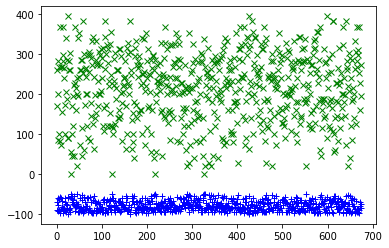

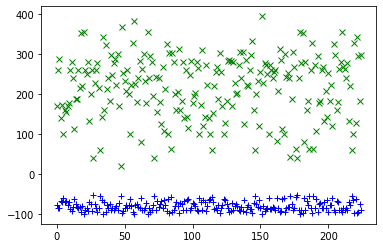

In [ ]:
from sklearn.model_selection import train_test_split
coef_separacion = 0.25
entrenar_X, test_X, entrenar_Y, test_Y = train_test_split(X.values.reshape(-1,1),Y.values.reshape(-1,1),test_size=coef_separacion,random_state=0,shuffle = True)
entrenar_X0, test_X0, entrenar_Y0, test_Y0 = train_test_split(X0.values.reshape(-1,1),Y0.values.reshape(-1,1),test_size=coef_separacion,random_state=0,shuffle = True)
entrenar_X1, test_X1, entrenar_Y1, test_Y1 = train_test_split(X1.values.reshape(-1,1),Y1.values.reshape(-1,1),test_size=coef_separacion,random_state=0,shuffle = True)
entrenar_X2, test_X2, entrenar_Y2, test_Y2 = train_test_split(X2.values.reshape(-1,1),Y2.values.reshape(-1,1),test_size=coef_separacion,random_state=0,shuffle = True)
entrenar_X3, test_X3, entrenar_Y3, test_Y3 = train_test_split(X3.values.reshape(-1,1),Y3.values.reshape(-1,1),test_size=coef_separacion,random_state=0,shuffle = True)
plot(entrenar_X,'b+', entrenar_Y,'gx')
figure(2)
plot(test_X,'b+',test_Y,'gx')

4.- La regresión lineal es un método para encontrar la línea recta o el hiperplano que mejor se adapta a un conjunto de puntos. Utilizar la función de regresión logistica multinomial con los parámetros de configuración por defecto para realizar el entrenamiento y ajustar el modelo con los datos:

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(entrenar_X.reshape(-1, 1), entrenar_Y)
# Información del modelo generado
print('Modelo todas las balizas: w= '+str(modelo.coef_)+' , b= '+str(modelo.intercept_))
print("Puntaje de Varianza. El mejor puntaje es un 1.0:", modelo.score(entrenar_X.reshape(-1, 1), entrenar_Y))

modelo0 = LinearRegression()
modelo0.fit(entrenar_X0.reshape(-1,1),entrenar_Y0)
# Información del modelo generado
print('Modelo baliza 0: w= '+str(modelo0.coef_)+' , b= '+str(modelo0.intercept_))
print("Puntaje de Varianza. El mejor puntaje es un 1.0:", modelo0.score(entrenar_X0.reshape(-1, 1), entrenar_Y0))

modelo1 = LinearRegression()
modelo1.fit(entrenar_X1.reshape(-1,1),entrenar_Y1)
# Información del modelo generado
print('Modelo baliza 1: w= '+str(modelo1.coef_)+' , b= '+str(modelo1.intercept_))
print("Puntaje de Varianza. El mejor puntaje es un 1.0:", modelo0.score(entrenar_X1.reshape(-1, 1), entrenar_Y1))

modelo2 = LinearRegression()
modelo2.fit(entrenar_X2.reshape(-1,1),entrenar_Y2)
# Información del modelo generado
print('Modelo baliza 2: w= '+str(modelo2.coef_)+' , b= '+str(modelo2.intercept_))
print("Puntaje de Varianza. El mejor puntaje es un 1.0:", modelo0.score(entrenar_X2.reshape(-1, 1), entrenar_Y2))

modelo3 = LinearRegression()
modelo3.fit(entrenar_X3.reshape(-1,1),entrenar_Y3)
# Información del modelo generado
print('Modelo baliza 3: w= '+str(modelo3.coef_)+' , b= '+str(modelo3.intercept_))
print("Puntaje de Varianza. El mejor puntaje es un 1.0:", modelo0.score(entrenar_X3.reshape(-1, 1), entrenar_Y3))


Modelo todas las balizas: w= [[-6.60475029]] , b= [-304.4006379]
Puntaje de Varianza. El mejor puntaje es un 1.0: 0.944945290522512
Modelo baliza 0: w= [[-6.64317861]] , b= [-305.87668422]
Puntaje de Varianza. El mejor puntaje es un 1.0: 0.9526981757706824
Modelo baliza 1: w= [[-6.71423092]] , b= [-310.56202155]
Puntaje de Varianza. El mejor puntaje es un 1.0: 0.9497472667610406
Modelo baliza 2: w= [[-6.45425547]] , b= [-295.13871503]
Puntaje de Varianza. El mejor puntaje es un 1.0: 0.9288593186659608
Modelo baliza 3: w= [[-6.55509859]] , b= [-300.14047051]
Puntaje de Varianza. El mejor puntaje es un 1.0: 0.9499061707518235


5.- Una vez creado el modelo, se puede evaluar la precisión para lo cual se deben generar las predicciones del 25 % de datos reservados para testear el modelo:

In [ ]:
predicciones_Y=modelo.predict(test_X)

predicciones_Y0=modelo0.predict(test_X0)
predicciones_Y1=modelo1.predict(test_X1)
predicciones_Y2=modelo2.predict(test_X2)
predicciones_Y3=modelo3.predict(test_X3)

Mostrar una gráfica con los 900 datos y el modelo total.

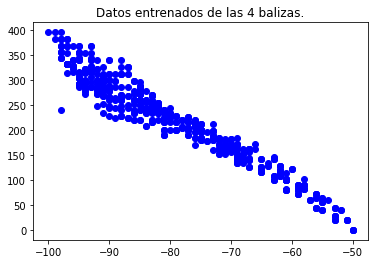

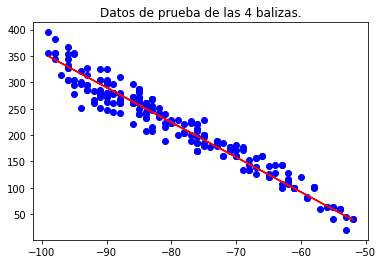

In [ ]:
plt.scatter(entrenar_X,entrenar_Y, label='datos',color='blue')
plt.title('Datos entrenados de las 4 balizas.');
figure(2)
plt.scatter(test_X,test_Y, label='datos',color='blue')
plt.plot(test_X, predicciones_Y, linestyle='-', color='red')
plt.title('Datos de prueba de las 4 balizas.');

Mostrar una gráfica con los datos de la baliza 0 (superior izquierda, es decir, 
coordenadas 0,0) y su modelo.

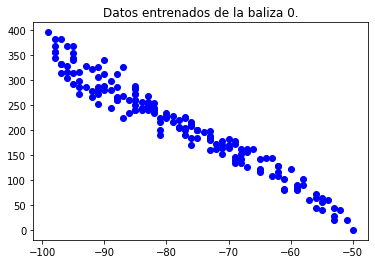

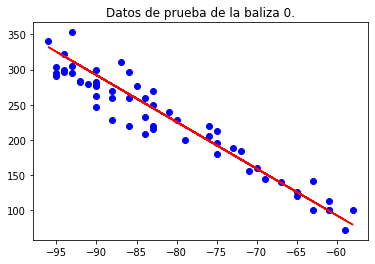

In [ ]:
plt.scatter(entrenar_X0,entrenar_Y0, label='datos',color='blue')
plt.title('Datos entrenados de la baliza 0.');
figure(2)
plt.scatter(test_X0,test_Y0, label='datos',color='blue')
plt.plot(test_X0, predicciones_Y0, linestyle='-', color='red')
plt.title('Datos de prueba de la baliza 0.');

Mostrar una gráfica con los datos de la baliza 1 (superior derecha, es decir, 
coordenadas 14,0)) y su modelo.

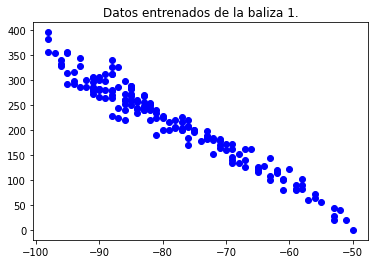

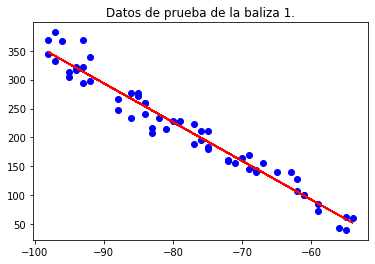

In [ ]:
plt.scatter(entrenar_X1,entrenar_Y1, label='datos',color='blue')
plt.title('Datos entrenados de la baliza 1.');
figure(2)
plt.scatter(test_X1,test_Y1, label='datos',color='blue')
plt.plot(test_X1, predicciones_Y1, linestyle='-', color='red')
plt.title('Datos de prueba de la baliza 1.');

Mostrar una gráfica con los datos de la baliza 2 (inferior derecha, es decir, 
coordenadas 14,14)) y su modelo.

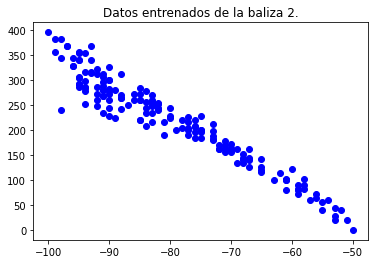

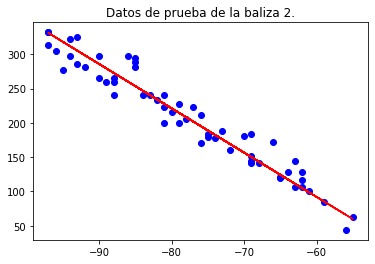

In [ ]:
plt.scatter(entrenar_X2,entrenar_Y2, label='datos',color='blue')
plt.title('Datos entrenados de la baliza 2.');
figure(2)
plt.scatter(test_X2,test_Y2, label='datos',color='blue')
plt.plot(test_X2, predicciones_Y2, linestyle='-', color='red')
plt.title('Datos de prueba de la baliza 2.');

Mostrar una gráfica con los datos de la baliza 3 (inferior izquierda, es decir, 
coordenadas 0,14)) y su modelo.

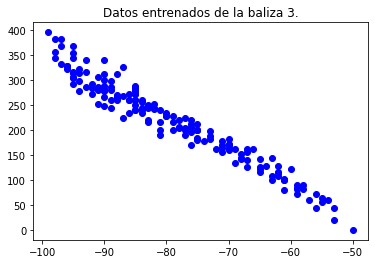

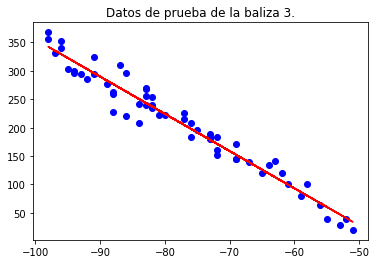

In [ ]:
plt.scatter(entrenar_X3,entrenar_Y3, label='datos',color='blue')
plt.title('Datos entrenados de la baliza 3.');
figure(2)
plt.scatter(test_X3,test_Y3, label='datos',color='blue')
plt.plot(test_X3, predicciones_Y3, linestyle='-', color='red')
plt.title('Datos de prueba de la baliza 3.');

7.- Calcular la raiz cuadrada del error cuadrático medio para cada modelo:

In [ ]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(test_Y, predicciones_Y, squared=False)
print('Error cuadratico medio (RMSE) del modelo total es: '+str(rmse)+ ' cm')

rmse=mean_squared_error(test_Y0, predicciones_Y0, squared=False)
print('Error cuadratico medio (RMSE) del modelo baliza 0 es: '+str(rmse)+ ' cm')

rmse=mean_squared_error(test_Y1, predicciones_Y1, squared=False)
print('Error cuadratico medio (RMSE) del modelo baliza 1 es: '+str(rmse)+ ' cm')

rmse=mean_squared_error(test_Y2, predicciones_Y2, squared=False)
print('Error cuadratico medio (RMSE) del modelo baliza 2 es: '+str(rmse)+ ' cm')

rmse=mean_squared_error(test_Y3, predicciones_Y3, squared=False)
print('Error cuadratico medio (RMSE) del modelo baliza 3 es: '+str(rmse)+ ' cm')

Error cuadratico medio (RMSE) del modelo total es: 18.730647143838116 cm
Error cuadratico medio (RMSE) del modelo baliza 0 es: 21.47847143142578 cm
Error cuadratico medio (RMSE) del modelo baliza 1 es: 18.598994859210613 cm
Error cuadratico medio (RMSE) del modelo baliza 2 es: 18.82752110326296 cm
Error cuadratico medio (RMSE) del modelo baliza 3 es: 18.696586590579482 cm


# 2.Creación de un modelo para varios atributos.

1.- Redacta 

In [ ]:
df = pd.read_json ('datos4.json', lines=True)

cuadrantes = []
numeros = []
numero = 0
for i in range(0,14):
  for j in range(0,14):
    
    df_mask=df['coord-x']<=i+1
    filtered_df = df[df_mask]
    df_mask2=filtered_df['coord-y']<=j+1
    filtered_df2 = filtered_df[df_mask2]
    df_mask3=filtered_df2['coord-x']>=i
    filtered_df3 = filtered_df2[df_mask3]
    df_mask4=filtered_df3['coord-y']>=j
    filtered_df4 = filtered_df3[df_mask4]
    #print(filtered_df4)
    cuadrante0 = 0
    cuadrante1 = 0
    cuadrante2 = 0
    cuadrante3 = 0
    numero+=1
    
    for i, baliza in enumerate(filtered_df4['balizas']):
      #print('b0: ',baliza[0]['señal'])
      cuadrante0 += baliza[0]['señal'] 
      #print('b1: ',baliza[1]['señal'])
      cuadrante1 += baliza[1]['señal'] 
      #print('b2: ',baliza[2]['señal'])
      cuadrante2 += baliza[2]['señal'] 
      #print('b3: ',baliza[3]['señal'])
      cuadrante3 += baliza[3]['señal']
      # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
      a = [baliza[0]['señal'], baliza[1]['señal'], baliza[2]['señal'], baliza[3]['señal']]
      cuadrantes.append(a)
      numeros.append(numero)
      Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
      Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])
 
    cuadrante0 = int(cuadrante0/4)
    #print('cuadrante0: ',cuadrante0)
    cuadrante1 = int(cuadrante1/4)
    #print('cuadrante1: ',cuadrante1)
    cuadrante2 = int(cuadrante2/4)
    #print('cuadrante2: ',cuadrante2)
    cuadrante3 = int(cuadrante3/4)
    #print('cuadrante3: ',cuadrante3)

    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [cuadrante0, baliza[1]['señal'], baliza[2]['señal'], baliza[3]['señal']]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])

    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [baliza[0]['señal'], cuadrante1, baliza[2]['señal'], baliza[3]['señal']]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])

    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [baliza[0]['señal'], baliza[1]['señal'], cuadrante2, baliza[3]['señal']]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])

    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [baliza[0]['señal'], baliza[1]['señal'], baliza[2]['señal'], cuadrante3]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])

    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [cuadrante0, cuadrante1, baliza[2]['señal'], baliza[3]['señal']]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])

    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [baliza[0]['señal'], cuadrante1, cuadrante2, baliza[3]['señal']]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])

    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [baliza[0]['señal'], baliza[1]['señal'], cuadrante2, cuadrante3]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])

    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [cuadrante0, baliza[1]['señal'], baliza[2]['señal'], cuadrante3]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])


    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [cuadrante0, cuadrante1, cuadrante2, baliza[3]['señal']]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])

    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [baliza[0]['señal'], cuadrante1, cuadrante2, cuadrante3]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])

    # Incluir los valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [cuadrante0, baliza[1]['señal'], cuadrante2, cuadrante3]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])

    # Incluir la media de valores de RSSI de cada baliza medidos en los extremos del cuadrante.
    a = [cuadrante0, cuadrante1, cuadrante2, cuadrante3]
    cuadrantes.append(a)
    numeros.append(numero)
    Xc = pd.DataFrame(data=cuadrantes,columns=["RSSI_0","RSSI_1","RSSI_2","RSSI_3"])
    Yc = pd.DataFrame(data=numeros,columns=["Cuadrante"])
display(Xc)
display(Yc)


,RSSI_0,RSSI_1,RSSI_2,RSSI_3
0,-50,-89,-100,-90
1,-53,-88,-99,-85
2,-53,-86,-93,-86
3,-51,-85,-98,-91
4,-51,-85,-98,-91
...,...,...,...,...
3131,-91,-98,-81,-56
3132,-91,-97,-82,-59
3133,-95,-97,-82,-56
3134,-91,-98,-82,-56


,Cuadrante
0,1
1,1
2,1
3,1
4,1
...,...
3131,196
3132,196
3133,196
3134,196


2.- Redacta

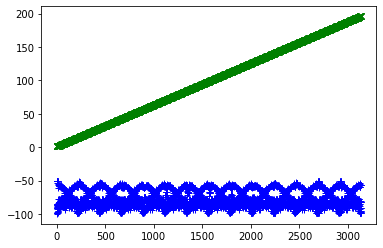

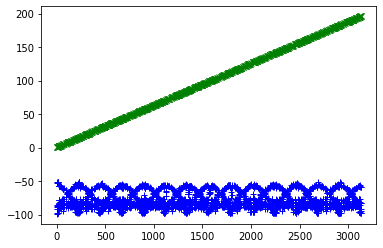

In [ ]:
coef_separacion = 0.25
entrenarc_X, testc_X, entrenarc_Y, testc_Y = train_test_split(Xc,Yc,test_size=coef_separacion,random_state=0)
plot(entrenarc_X,'b+', entrenarc_Y,'gx')
figure(2)
plot(testc_X,'b+',testc_Y,'gx')

3.- Utilizar la función de regresión logistica multinomial con los parámetros de configuración por defecto para realizar el entrenamiento y ajustar el modelo con los datos:

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
#logreg.fit(Xc,Yc)
#logreg.fit(entrenarc_X,entrenarc_Y)
logreg.fit(entrenarc_X,entrenarc_Y.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

4.- Una vez creado el modelo, se puede evaluar la precisión para lo cual se deben generar las predicciones del 25 % de datos reservados para testear el modelo:

In [ ]:
prediccionesc_Y=logreg.predict(testc_X)
#prediccionesc_Y=logreg.predict(Xc)
prediccionesc_Y

array([174, 110, 186, 194,  61, 131,  69, 126, 138, 136, 117, 114, 121,
        14, 194, 105, 138, 185,  98,  73, 196, 114, 105, 150,   1,  51,
        69,  76,  76,  94, 109,  73, 114, 126, 138, 141,  61, 194, 194,
        57, 150,  22,  23, 102, 105, 185,  14, 126, 184,  76, 136, 114,
        76,  76, 176, 151,  29,  23,  76,  23,  24, 105,  40,  15, 114,
       128, 175, 196,  73, 102,  72,  25, 194, 151,  24, 120,  61,  98,
        23,  61, 105,  99,  61, 117,  14, 150, 185, 194,  15, 175, 190,
        25, 190, 125, 120,  14, 185, 150, 123, 123, 150,  15, 151, 176,
       185, 126,  28, 151, 136, 169,  25,   4, 151, 174, 105,   9, 174,
       185,  73,  14,  57, 105, 114, 126, 181,  22, 126, 138, 176, 190,
       114,  22, 105, 138, 181, 185, 120,  25,  73, 176, 196,  76,  71,
        22, 114, 185, 126, 186,  29, 185,  22,  72, 102,  61, 194, 105,
       171,  76, 171, 125, 150, 123, 184,  61,  43, 174,  99, 102, 123,
       120, 127,  73,  69, 114, 185, 141,  76,  76,  76,  73, 11

5.- Comparar las predicciones obtenidas con los datos reservados para testear el modelo, obteniendo la matriz de confusión:

In [ ]:
from sklearn import metrics
matriz_confusion = metrics.confusion_matrix(testc_Y, prediccionesc_Y)
#matriz_confusion = metrics.confusion_matrix(Yc, prediccionesc_Y)
matriz_confusion
#print("Recall:",metrics.recall_score(test_Y, predicciones_Y))

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

6.- Estimar la exactitud del modelo creado, de tal forma, que se consideran  buenos resultados si la exactitud está próxima a 1, lo que equivale al 100% de exactitud:

In [ ]:
print("Exactitud:",metrics.accuracy_score(testc_Y, prediccionesc_Y))
#print("Exactitud:",metrics.accuracy_score(Yc, prediccionesc_Y))

Exactitud: 0.06505102040816327


Calcular un cuadrante a partir de las señales

# 3. Calcular el cuadrante en el que se encuentra el robot a partir de niiveles de señal de cada baliza


In [ ]:
from sklearn.linear_model import LinearRegression
modeloc = LinearRegression()
modeloc.fit(entrenarc_X, entrenarc_Y)
print("Puntaje de Varianza. El mejor puntaje es un 1.0:", modeloc.score(entrenarc_X, entrenarc_Y))

señal0 = 50
señal1 = 53
señal2 = 51
señal3 = 53
coeficientes = modeloc.coef_
print(modeloc.intercept_ + (coeficientes[0][0] * señal0) + (coeficientes[0][1] * señal1) + (coeficientes[0][2] * señal2) + (coeficientes[0][3] * señal3))

Puntaje de Varianza. El mejor puntaje es un 1.0: 0.03887016605408333
[371.26802922]


# 4. Calcular la coordenada en la que se encuentra el robot mediante trilateración
Utilizando un algoritmo de trilateración podemos calcular la coordenada en la que se encuentra el robot. Utlizamos 3 coordenadas (ubicaciones de cada baliza) y 3 distancias (distancias desde el robot a cada baliza)  

In [10]:
def trilateracionAlgoritmo():
  x1 = 0
  y1 = 0
  x2 = 0
  y2 = 14
  x3 = 14
  y3 = 14

  r1 = 14.42
  r2 = 8.25
  r3 = 6.33

  A = 2*x2 - 2*x1
  B = 2*y2 - 2*y1
  C = r1**2 - r2**2 - x1**2 + x2**2 - y1**2 + y2**2
  D = 2*x3 - 2*x2
  E = 2*y3 - 2*y2
  F = r2**2 - r3**2 - x2**2 + x3**2 - y2**2 + y3**2
  x = (C*E - F*B) / (E*A - B*D)
  y = (C*D - A*F) / (B*D - A*E)
  return x,y

x,y = trilateracionAlgoritmo()

print("Coordeada final:")
print('(',x,', ',y,')')


Coordeada final:
( 7.999771428571429 ,  11.995496428571428 )
